<a href="https://colab.research.google.com/github/M-Abbi/Financial-Modeling/blob/main/Support_Vector_Machines_(SVMs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Support Vector Machines (SVMs)

Support Vector Machines (SVMs) are supervised learning algorithms primarily used for classification and regression tasks. SVMs aim to find the optimal hyperplane that best separates data points belonging to different classes. This "optimal" hyperplane is the one that maximizes the margin, which is the distance between the hyperplane and the nearest data points from each class (these nearest points are called support vectors).

**Key Concepts:**

- **Hyperplane**: In an n-dimensional space, a hyperplane is an (n−1)-dimensional subspace. For a 2D dataset, it's a line; for 3D, it's a plane.

- **Margin**: The distance between the separating hyperplane and the closest data points (support vectors) from each class. The goal of SVM is to find the hyperplane with the maximum margin, as this often leads to better generalization on unseen data.

- **Support Vectors**: The data points that lie closest to the decision boundary (hyperplane). These points are crucial in defining the hyperplane and influencing the model.

- **Kernel Trick**: SVMs can handle non-linearly separable data by using kernel functions. These functions map the original data into a higher-dimensional space where a linear hyperplane can effectively separate the classes. Common kernels include linear, polynomial, radial basis function (RBF), and sigmoid.

Why are SVMs relevant in Banking?

While deep learning has gained prominence, SVMs can still be valuable in specific applications, particularly when dealing with smaller to medium-sized datasets and when interpretability (to some extent) is desired. Examples include:

- Sentiment Analysis: Classifying news articles or social media sentiment as positive or negative for market prediction.
Credit Risk Assessment: Predicting whether a borrower will default based on financial ratios.
- Algorithmic Trading Signals: Generating buy/sell signals based on technical indicators.
- Fraud Detection: Identifying unusual transaction patterns.



# Simple Python Application: Predicting Stock Return Direction

Let's create a basic Python script using the scikit-learn library to build an SVM model.

Accuracy: 0.90
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        29
           1       0.84      1.00      0.91        31

    accuracy                           0.90        60
   macro avg       0.92      0.90      0.90        60
weighted avg       0.92      0.90      0.90        60



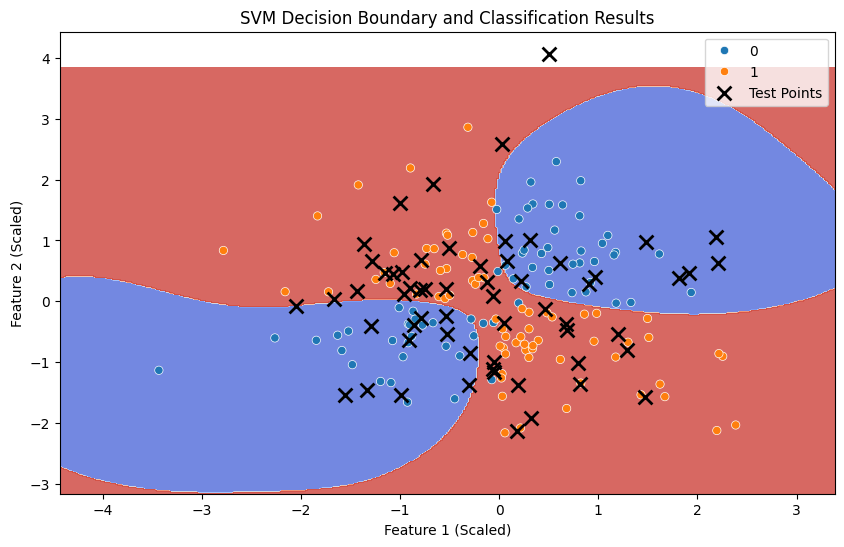

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 1. Generate Sample 2D Data
np.random.seed(42)
X = np.random.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)  # Create a non-linear separable dataset

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train SVM Model (RBF Kernel for non-linear data)
model = SVC(kernel='rbf', C=1, gamma='scale', probability=True)  # Added probability=True for plotting
model.fit(X_train_scaled, y_train)

# 5. Make Predictions
y_pred = model.predict(X_test_scaled)

# 6. Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# 7. Visualize Decision Boundary and Results
plt.figure(figsize=(10, 6))

# Create a mesh to plot in
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Use the scaled training data for the meshgrid
Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=y_train)

# Plot the test points
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='x', s=100, linewidth=2, color='black', label='Test Points')

plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.title("SVM Decision Boundary and Classification Results")
plt.legend()
plt.show()